In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import matplotlib.pyplot as plt
from matplotlib import cm

def draw_all_rewards(all_dfs, labels, save_path):
    plt.figure(figsize=(10, 6))
    
    # Use the 'tab10' colormap from matplotlib
    colormap = cm.get_cmap('tab10')
    
    for idx, (label, dfs) in enumerate(zip(labels, all_dfs)):
        color = colormap(idx % 10)  # Cycle through the first 10 colors of 'tab10'

        # Process each DataFrame: calculate smoothed values
        processed_dfs = []
        for df in dfs:
            df['Smoothed Value'] = df['Value'].ewm(alpha=0.01).mean()
            processed_dfs.append(df['Smoothed Value'])

        # Combine all smoothed values into a single DataFrame
        combined_df = pd.concat(processed_dfs, axis=1)
        
        # Calculate the mean and standard deviation across all seeds
        mean_values = combined_df.mean(axis=1)
        std_values = combined_df.std(axis=1)
        
        # Plot the mean values with the standard deviation
        plt.plot(df['Step'][15:], mean_values[15:], label=label, color=color, linewidth=2, zorder=3)
        plt.fill_between(df['Step'][15:], (mean_values - std_values)[15:], (mean_values + std_values)[15:], 
                         color=color, alpha=0.15, zorder=2)

    # Add labels and legend
    plt.xlabel('Step', fontweight='bold')
    plt.ylabel('Epoch Average Reward', fontweight='bold')
    plt.legend(prop={'weight':'bold'})
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # 白色的粗线grid
    plt.grid(color='white', linewidth=2, alpha=0.5, zorder=1)
    # 背景灰色, 透明度0.1
    plt.gca().set_facecolor((0.5, 0.5, 0.5, 0.05))
    plt.savefig(save_path, dpi=800)


/tmp/ipykernel_1245792/3721076057.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10')


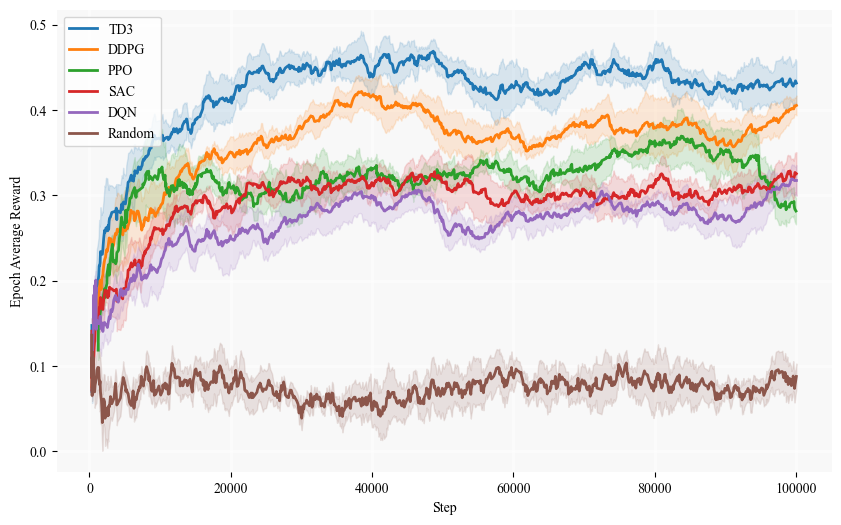

In [34]:
all_dfs = []
seeds = [21, 32, 7, 11, 88]
model_names = ['TD3', 'DDPG', 'PPO', 'SAC', 'DQN', 'Random']
for model_name in model_names:
    model_name = model_name.lower()
    dfs = [pd.read_csv(f"/data/home/yeyongyu/SHU/ReinforceMatDesign/rewards/{model_name}/{model_name}-sd{seed}.csv") for seed in seeds]
    all_dfs.append(dfs)
    
draw_all_rewards(all_dfs, model_names, '/data/home/yeyongyu/SHU/ReinforceMatDesign/rewards/all_rewards.pdf')